#Кроль Данило
##ФІТ 2-16
##Варіант 10

S0 (x) = 1.36 + -2.4291*(x - 1.2) + 0*(x - 1.2)^2 + 34.4768*(x - 1.2)^3 ,	x є [1.2, 1.4]
S1 (x) = 1.15 + 1.7081*(x - 1.4) + 20.6861*(x - 1.4)^2 + -43.8588*(x - 1.4)^3 ,	x є [1.4, 1.7]
S2 (x) = 2.34 + 2.2779*(x - 1.7) + -18.7869*(x - 1.7)^2 + 18.4099*(x - 1.7)^3 ,	x є [1.7, 2.3]
S3 (x) = 0.92 + -0.3837*(x - 2.3) + 14.351*(x - 2.3)^2 + -9.5673*(x - 2.3)^3 ,	x є [2.3, 2.8]


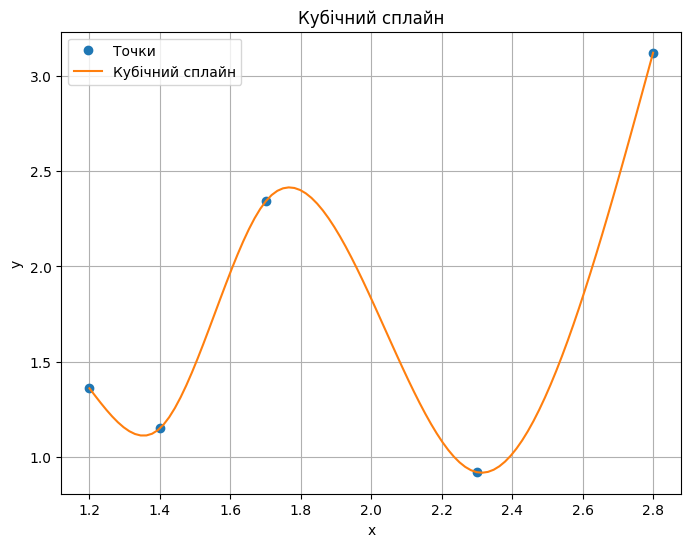

In [ ]:
x = [1.2, 1.4, 1.7, 2.3, 2.8]
y = [1.36, 1.15, 2.34, 0.92, 3.12]

n = len(x)

def zeros(n, k=0):
  return [k for i in range(n)]

def Spline_f(i, x, a, b, c, d):
  return f"S{i} (x) = {round(a[i], 4)} + {round(b[i+1], 4)}*(x - {round(x[i], 4)}) + {round(c[i], 4)}*(x - {round(x[i], 4)})^2 + {round(d[i+1], 4)}*(x - {round(x[i], 4)})^3"

def Spline_comp(x, pieses, a, b, c, d):
  i = 0
  while i < len(pieses):
    if x >= pieses[i][0] and x <= pieses[i][1]:
      break
    i += 1
  x0 = pieses[i][0]
  return a[i] + b[i+1]*(x - x0) + c[i]*(x - x0)**2 + d[i+1]*(x - x0)**3

h = zeros(n)
k = zeros(n)
m = zeros(n)
alpha = zeros(n)
beta = zeros(n)
c = zeros(n)
b = zeros(n)
d = zeros(n)

for i in range(1, n):
  h[i] = x[i]-x[i-1]

for i in range(2, n):
  k[i] = 3 * (((y[i]-y[i-1])/h[i]) - ((y[i-1]-y[i-2])/h[i-1]))
  m[i] = 2 * (h[i-1] + h[i])

alpha[2] = k[2]/m[2]
beta[2] = h[2]/m[2]

for i in range(3, n):
  alpha[i] = (k[i]-h[i-1]*alpha[i-1]) / (m[i]-h[i-1]*beta[i-1])
  beta[i] = h[i] / (m[i] - h[i-1]*beta[i-1])

c[3] = alpha[4]
for i in range(2, 0, -1):
  c[i] = alpha[i+1] - beta[i+1] * c[i+1]


for i in range(1, n):
  d[i] = (c[i] - c[i-1])/(3*h[i])
  b[i] = ((y[i]-y[i-1])/h[i]) - (((c[i] + 2*c[i-1])*h[i])/3)


for i in range(n-1):
  print(Spline_f(i, x, y, b, c, d), f",\tx є [{x[i]}, {x[i+1]}]")

p = [[x[i], x[i+1]] for i in range(n-1)]

x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = [Spline_comp(i, p, y, b, c, d) for i in x_new]

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()

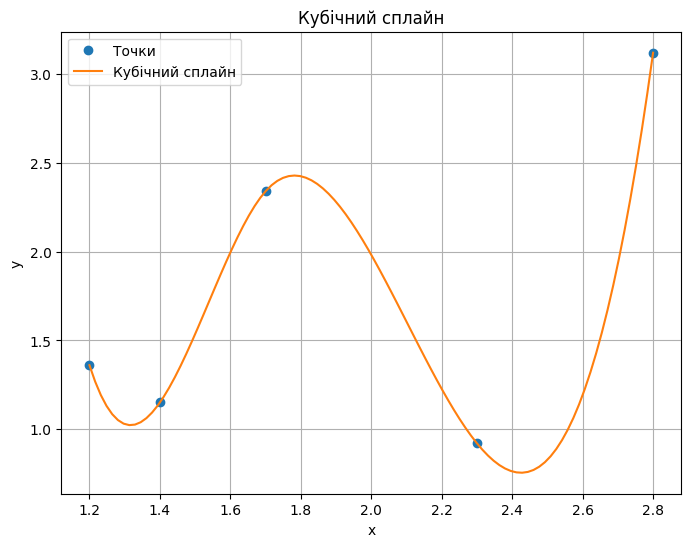

In [ ]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import numpy as np

cs = CubicSpline(x, y)
y_new = cs(x_new)

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()